In [2]:
import mne
import seaborn as sns
from pathlib import Path
from matplotlib import pyplot as plt
import re
from datetime import datetime
import utils
from dotenv import load_dotenv
import os

%matplotlib widget

load_dotenv()

epilepsy_filepath = os.getenv('EPILEPSY')
healthy_filepath = os.getenv('HEALTHY')
epilepsy = Path(epilepsy_filepath)
healthy = Path(healthy_filepath)

print(healthy_filepath)
electrode_subset = []

Datasets/resting-state-eeg
Datasets/resting-state-eeg


Reading c:\Users\Devin\Documents\Code\hack49\ml\Datasets\resting-state-eeg\sub-01\ses-1\eeg\sub-01_ses-1_task-eyesclosed_eeg.fdt
Reading 0 ... 149999  =      0.000 ...   299.998 secs...


<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, AF3, AF7, Fz, F1, F3, F5, F7, FC1, FC3, FC5, FT7, Cz, C1, ...
 chs: 61 EEG
 custom_ref_applied: False
 dig: 64 items (3 Cardinal, 61 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 61
 projs: []
 sfreq: 500.0 Hz
>

Using matplotlib as 2D backend.


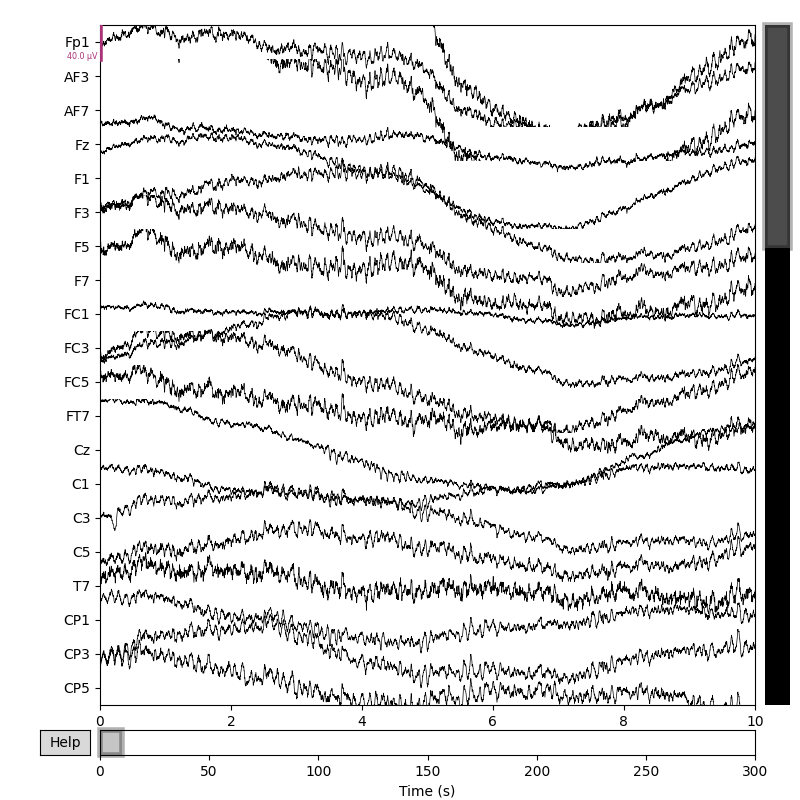

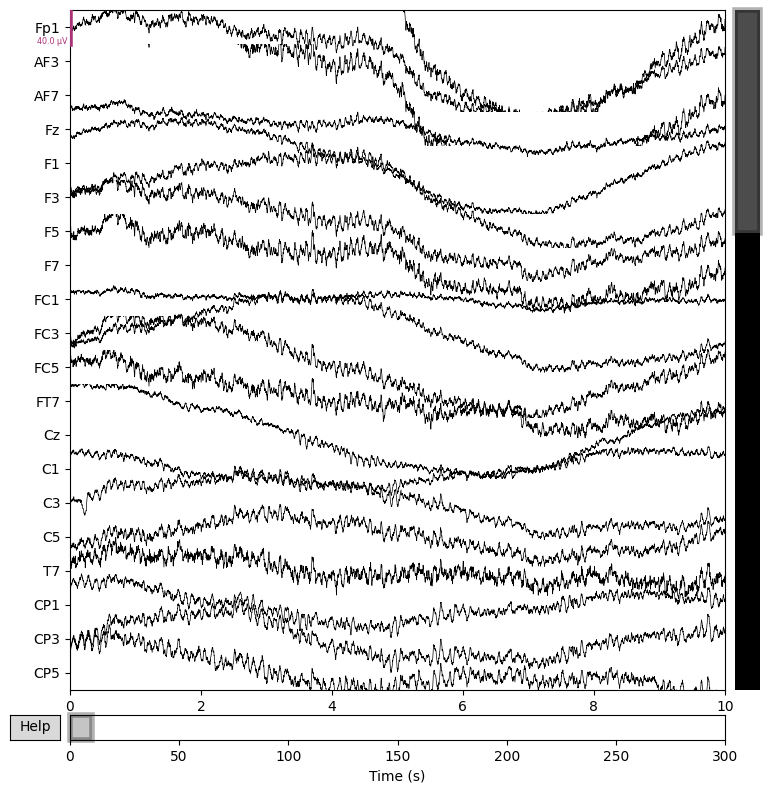

In [3]:
subj = Path(healthy, "sub-01")
session = Path(subj, "ses-1", "eeg")
h_edf = mne.io.read_raw_eeglab(
    Path(session, "sub-01_ses-1_task-eyesclosed_eeg.set"),
    preload=True
)
h_edf.set_montage("standard_1020", on_missing="warn")
display(h_edf.info)
# display(h_edf.ch_names)
h_edf.plot()

<Info | 9 non-empty values
 bads: []
 ch_names: Fp1, F3, C3, P3, O1, F7, T3, T5, Fc1, Fc5, Cp1, Cp5, F9, Fz, Cz, ...
 chs: 29 EEG
 custom_ref_applied: False
 dig: 24 items (3 Cardinal, 21 EEG)
 highpass: 1.6 Hz
 lowpass: 30.0 Hz
 meas_date: 2016-01-01 19:39:33 UTC
 nchan: 29
 projs: []
 sfreq: 512.0 Hz
 subject_info: 1 item (dict)
>

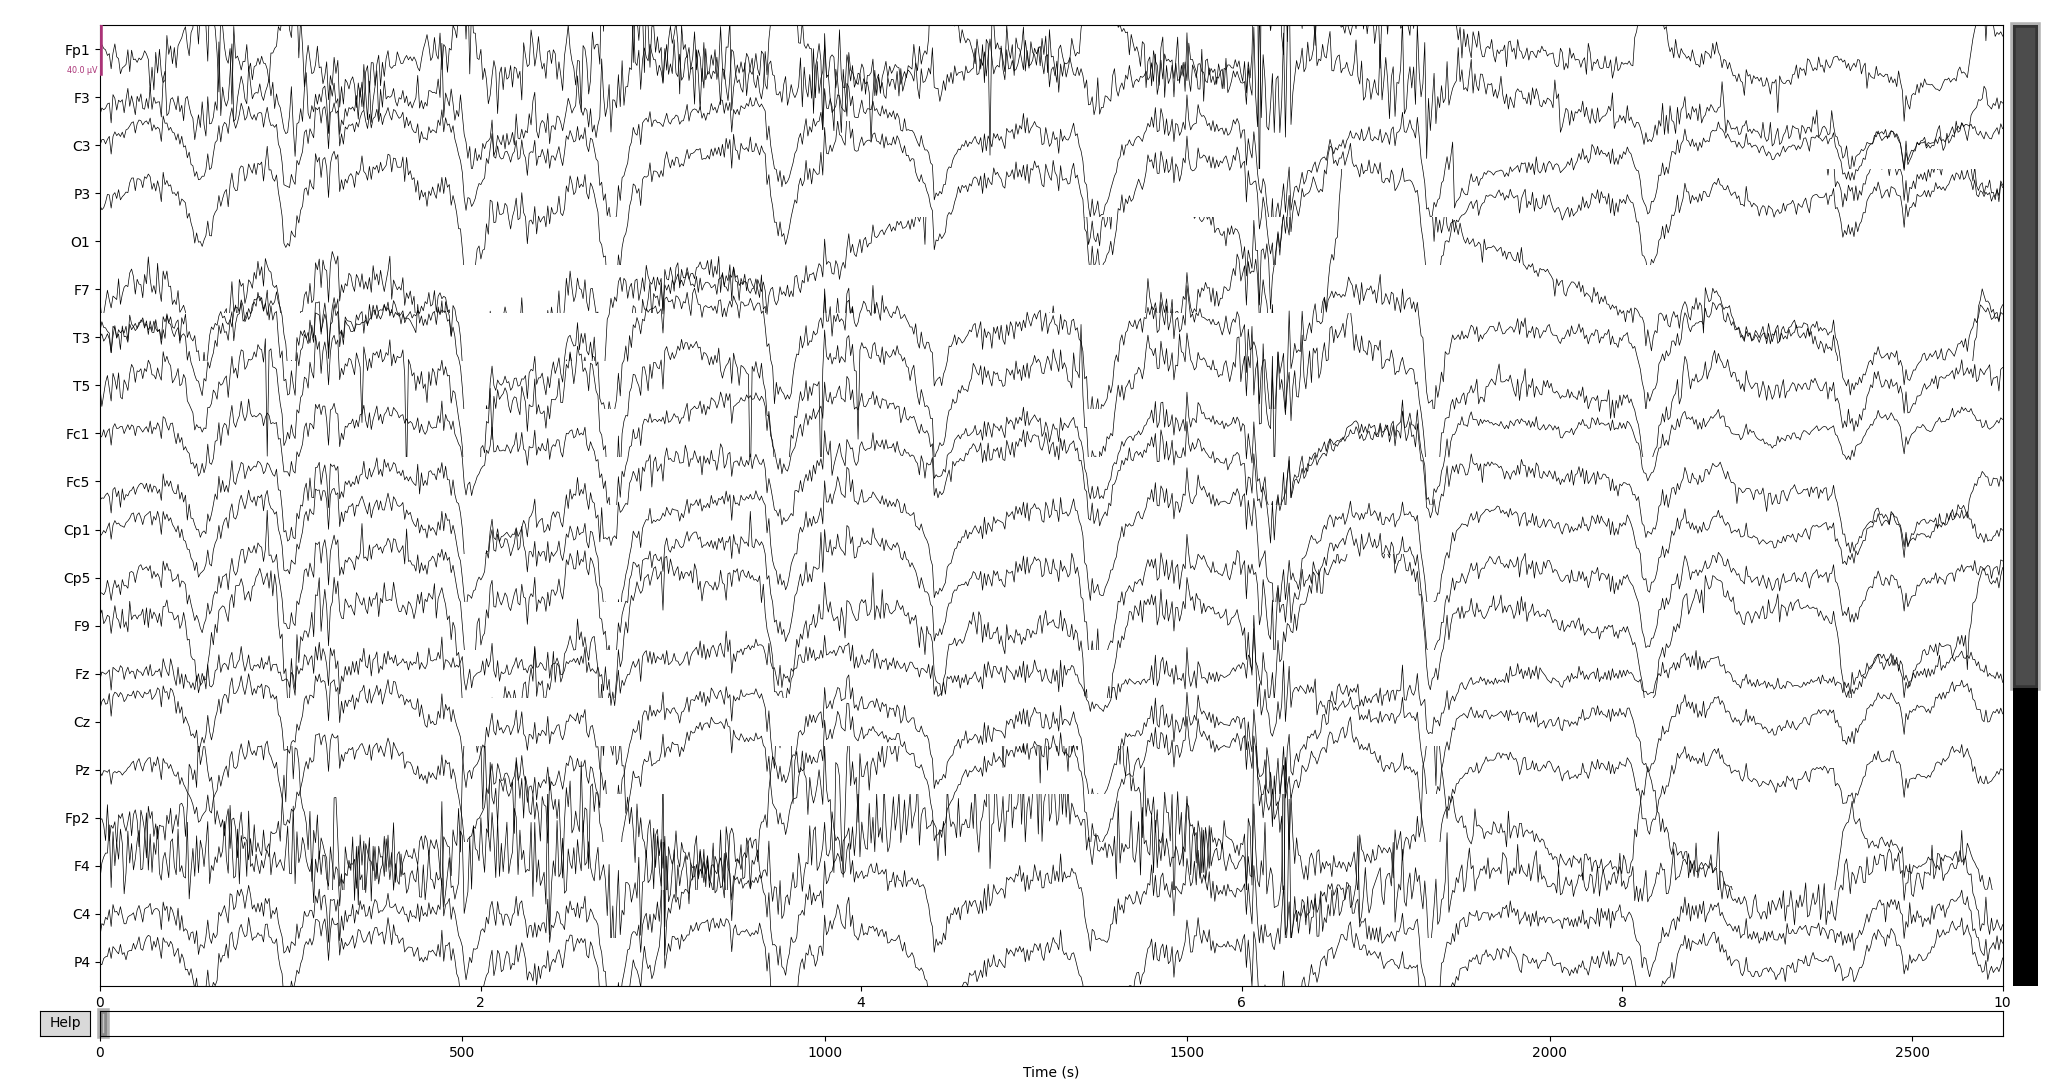

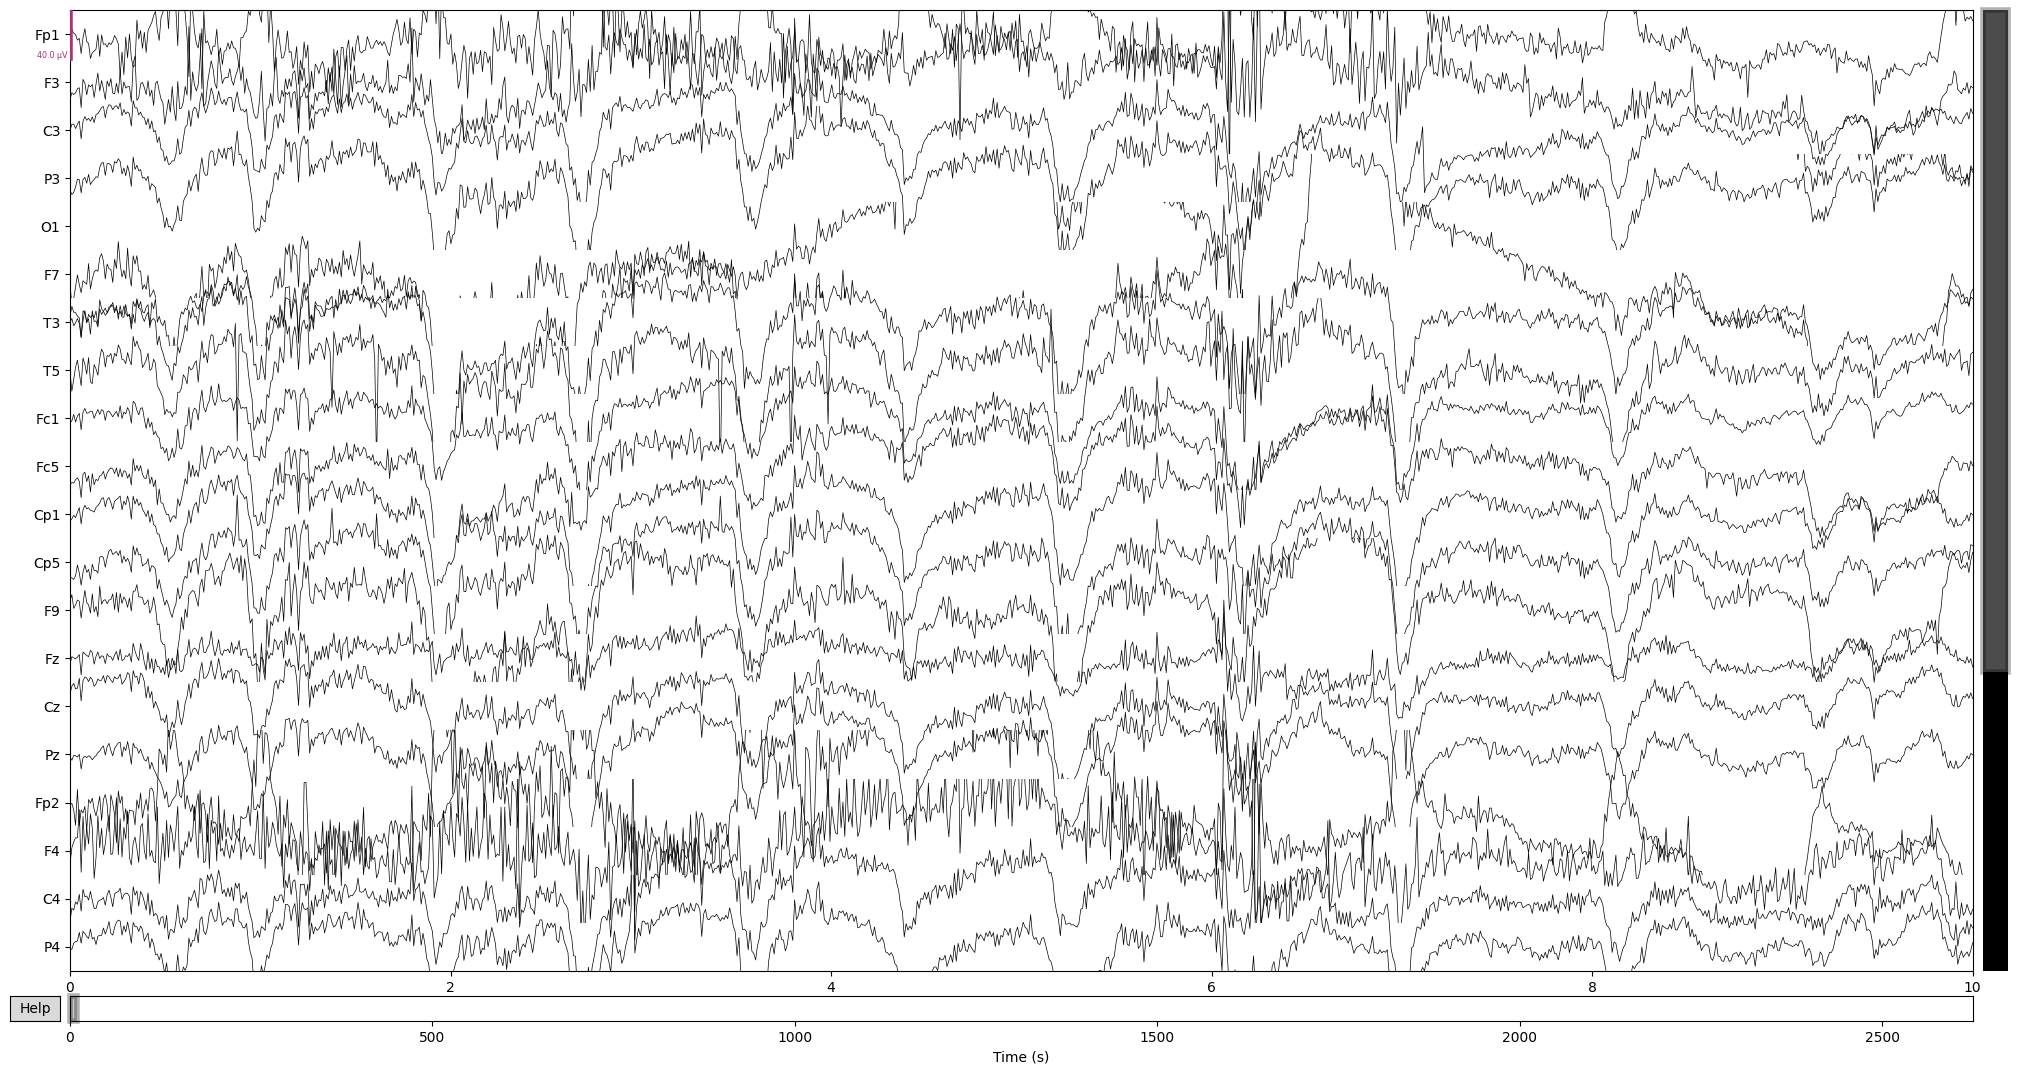

In [15]:
subj = Path(epilepsy, "PN00")
ep_edf = mne.io.read_raw_edf(
    Path(subj, "PN00-1.edf"),
    preload=True,
    infer_types=True,
    exclude=["EKG EKG", "SPO2", "HR", "1", "2", "MK"],
    verbose=False,
)
ep_edf.set_montage("standard_1020", on_missing="ignore")
display(ep_edf.info)
# display(ep_edf.ch_names)
ep_edf.plot()

In [16]:
file_path = Path(subj, "Seizures-list-PN00.txt")
seizure_times = utils.read_seizure_times(file_path)
print(seizure_times)

[(1143.0, 1213.0), (-61256.0, -61202.0), (765.0, 4425.0), (1006.0, 1080.0), (904.0, 971.0)]
